### Outlier Analysis

In [3]:
# Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the data
file_path = "../data/Visa_Predection_Dataset.csv"
df_visa = pd.read_csv(file_path)

In [5]:
df_visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Box Plot


<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="Box Plot" width="768px">

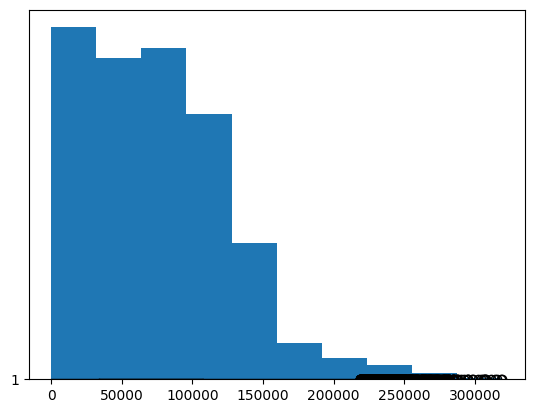

In [14]:
plt.boxplot(df_visa["prevailing_wage"], vert=False)
# plt.hist(df_visa['prevailing_wage'])
plt.show()

# black dots are outliers

### Dealing with the outlier

- Removal of outliers.
- Impute the outliers with the median value, because median is not impacted by outliers
- Cap the outliers with q3 that are having values more than q3.
- Cap the outliers wiht q1 that are having values less than q1.

#### Find the outliers

- Q3+1.5*IQR > and Q1-1.5*IQR
- step-1: calculate Q1, Q2, Q3
- step-2: calculate IQR=(Q3 - Q1)
- step-3: upper_bound = Q3+1.5*IQR
- step-4: lower_bound = Q1-1.5*IQR
- step-5: col1 > ub
- step-6: col2 < lb
- step-7: con1|con2
- step-8: col[con1&con2]

In [15]:
Q1 = np.percentile

In [46]:
len(df_visa['prevailing_wage'][con1|con2])

427

In [87]:
def outliers(col1):
    q1 = round(np.percentile(col1, 25), 2)
    q2 = round(np.percentile(col1, 50), 2)
    q3 = round(np.percentile(col1, 75), 2)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    con1 = col1 > upper_bound
    con2 = col1 < lower_bound
    
    outliers_df = col1[con1 | con2]

    
    outliers_count = len(outliers_df)
    outliers_values = outliers_df.values
    print("Quartile 1: ", q1)
    print("Quartile 2 or Median: ", q2)
    print("Quartile 3: ", q3)
    print("Inter Quartile Range: ", iqr)
    print("Upper Bound: ", upper_bound)
    print("Lower Bound: ", lower_bound)
    print("Total outliers count: ", outliers_count)
    print("Outliers Dataframe: \n", outliers_df.head())

In [101]:
col1 = df_visa['prevailing_wage']
q1 = round(np.percentile(col1, 25), 2)
q2 = round(np.percentile(col1, 50), 2)
q3 = round(np.percentile(col1, 75), 2)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

con1 = col1 > upper_bound
con2 = col1 < lower_bound
outliers_df = df_visa[con1|con2]
outliers_count = len(col1[con1 | con2])
outliers_values = col1[con1 | con2].values


print("Quartile 1: ", q1)
print("Quartile 2 or Median: ", q2)
print("Quartile 3: ", q3)
print("Inter Quartile Range: ", iqr)
print("Upper Bound: ", upper_bound)
print("Lower Bound: ", lower_bound)
print("Total outliers count: ", outliers_count)
outliers_df

Quartile 1:  34015.48
Quartile 2 or Median:  70308.21
Quartile 3:  107735.51
Inter Quartile Range:  73720.03
Upper Bound:  218315.555
Lower Bound:  -76564.565
Total outliers count:  427


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [ ]:
# Case 1: removal of outliers

# we have 427 outliers in the prevailing_wage column
# that means, we need to remove 427 rows from the enitre dataframe

In [102]:
# getting the non outliers dataframe
# we will reverse the bound condition
# and get in between values by and operation

con3 = col1 < upper_bound
con4 = col1 > lower_bound

non_outliers_df = df_visa[con3 & con4]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


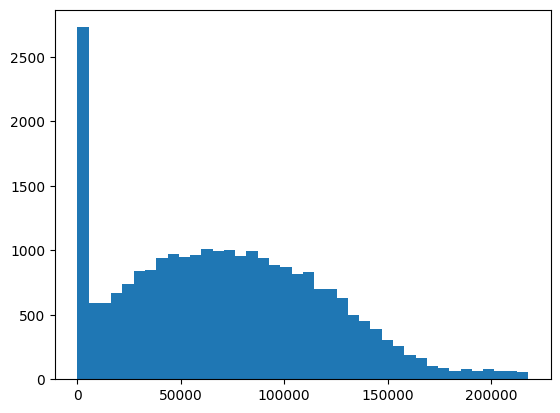

In [106]:
# plt.boxplot(non_outliers_df['prevailing_wage'], vert=False)
plt.hist(non_outliers_df['prevailing_wage'], bins=40)
plt.show()

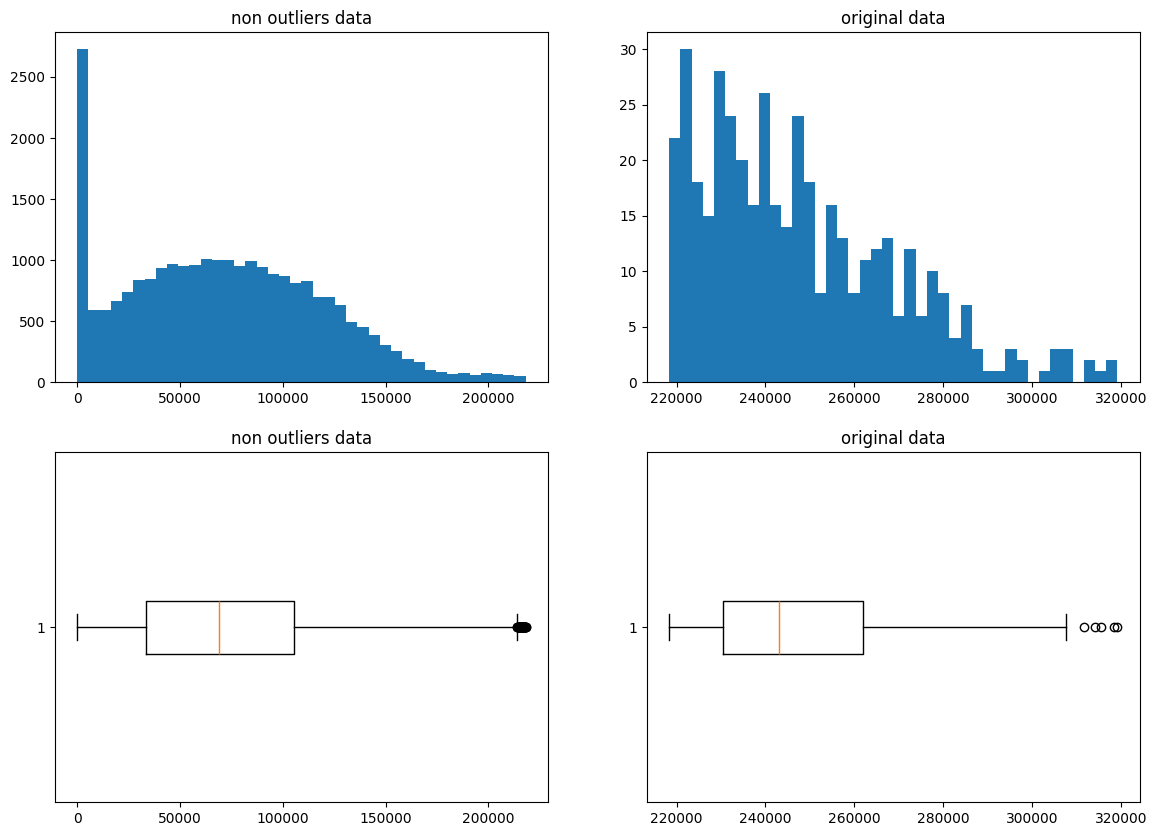

In [127]:
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
plt.title('non outliers data')
plt.hist(non_outliers_df['prevailing_wage'], bins=40)

plt.subplot(2,2,2)
plt.title('original data')
plt.hist(outliers_df['prevailing_wage'], bins=40)

plt.subplot(2,2,3)
plt.title('non outliers data')
plt.boxplot(non_outliers_df['prevailing_wage'], vert=False)

plt.subplot(2,2,4)
plt.title('original data')
plt.boxplot(outliers_df['prevailing_wage'], vert=False)

plt.show()

In [128]:
# case 2: Impute with median
df_visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [130]:
outliers = df_visa["prevailing_wage"][con1|con2]
len(outliers)

427

In [184]:
new_data = []
for i in df_visa['prevailing_wage']:
    if (i > upper_bound or i < lower_bound):
        new_data.append(df_visa['prevailing_wage'].median())
    else:
        new_data.append(i)

# We iterate through through df_visa['prevailing_wage'] series data
# if any datapoint > ub or < lb means it's a outlier, so In that case we are keeping or repacing median value value
# else we're leaving as it is.

In [198]:
con1 = df_visa['prevailing_wage'] > upper_bound
con2 = df_visa['prevailing_wage'] < lower_bound
con = con1 | con2
df_visa['prevailing_wage_imputed_new'] = np.where(con, df_visa['prevailing_wage'].median(), df_visa['prevailing_wage'])

#### $np.where$

In [149]:
dict1 = {
    "col1": [1, 2, 3, 4],
    "col2": ["A", "B", "C", "D"]
}

data = pd.DataFrame(dict1)
data
# I want to impute with a value of 100 in the col1
# that are having values > 2.
# Col1 Col2
# 1    A
# 2    B
# 100   C
# 100   D

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


In [156]:
# np.where() will take 3 argument values
# condition: data['col1'] > 2
# if condition is true, provide true value = 100
# if condition is false, will keep the same value: data['col1']
# np.where(<condition>, <True_Value>, <False_Value>)

con = data['col1'] > 2
new_data = np.where(con, 100, data['col1'])

# works for only binary conditions. (not multiple conditions)
# True or False
# If Else

In [154]:
data['col1']

0    1
1    2
2    3
3    4
Name: col1, dtype: int64

In [158]:
data

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


#### Case - 1:
##### Create a new column

In [160]:
data['new_column'] = [100, 200, 300, 400]
data['col3'] = np.where(con, 100, data['col1'])

In [161]:
data

,col1,col2,new_column,col3
0,1,A,100,1
1,2,B,200,2
2,3,C,300,100
3,4,D,400,100


#### Case - 2:
##### Overwrite the column values

In [163]:
data['col1'] = np.where(con, 100, data['col1'])

In [164]:
data

,col1,col2,new_column,col3
0,1,A,100,1
1,2,B,200,2
2,100,C,300,100
3,100,D,400,100


In [172]:
data.drop(["new_column", "col3"], axis=1, inplace=True)

In [173]:
data

,col1,col2
0,1,A
1,2,B
2,100,C
3,100,D


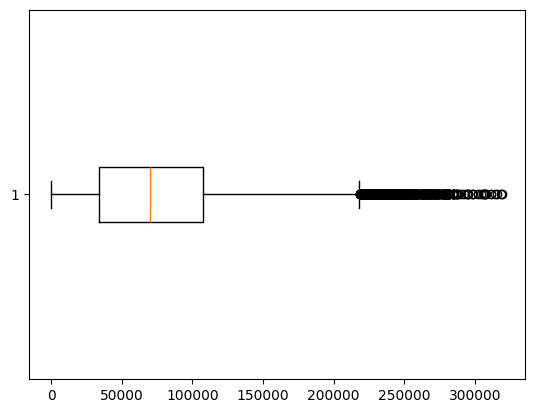

In [212]:
plt.boxplot(df_visa['prevailing_wage'], vert=False)
plt.show()